# Logistic Regression (이진 분류(Binary Classification)를 풀기 위한 대표적인 알고리즘)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# sigmoid 함수 
def sigmoid(x):
    return  1/(1+np.exp(-x))

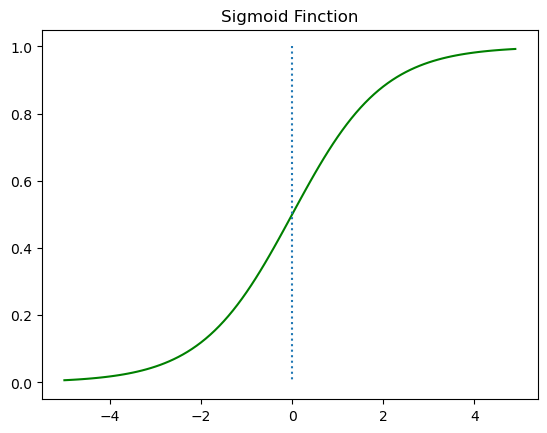

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g') # x,y데이터를 초록색 선으로 표시
plt.plot([0,0], [1.0, 0.0], ':') # x좌표가 0 -> 0으로 y좌표가 1.0 -> 0.0까지 :으로 줄 표시(점선)
plt.title('Sigmoid Finction')
plt.show()

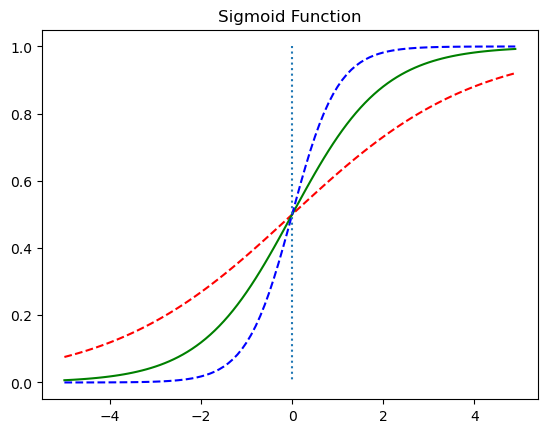

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 *x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # x, y1에 대해서 빨간색 점선으로 데이터 표시 
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

Text(0.5, 1.0, 'Sigmoid Function')

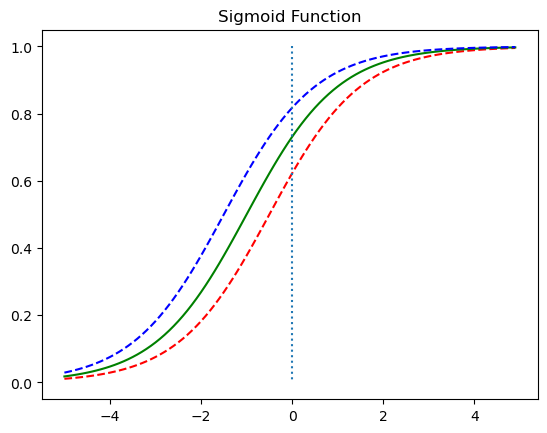

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmoid Function')


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(42)

In [20]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [46]:
W = torch.zeros((2, 1), requires_grad=True) # [6, 2] x [2, 1] = [6, 1] 이므로 [2,1] 형태의 tensor로 W를 만들어야 함.
b = torch.zeros(1, requires_grad=True)

# hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
hypothesis = torch.sigmoid(x_train @ W + b)
print(hypothesis)

losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

cost = losses.mean()
print(cost)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)
tensor(0.6931, grad_fn=<MeanBackward0>)


In [24]:
# 직접 구현하지 않고 torch.nn.functional.binary_cross_entropy를 사용할 수 도 있음
print(F.binary_cross_entropy(hypothesis, y_train))

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)


In [25]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_trian = torch.FloatTensor(y_data)

In [50]:
# 모델 초기화 (0으로)
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 원하는 값으로 초기화 torch.full
# W = torch.full((2, 1), 0.5, requires_grad=True)
# b = torch.full((1,), 0.5, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1e-01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    # cost = -(y_train * torch.log(hypothesis) +  (1 - y_train) * torch.log(1 - hypothesis)).mean()
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.414327
Epoch  200/1000 Cost: 0.349521
Epoch  300/1000 Cost: 0.301302
Epoch  400/1000 Cost: 0.263532
Epoch  500/1000 Cost: 0.233518
Epoch  600/1000 Cost: 0.209313
Epoch  700/1000 Cost: 0.189496
Epoch  800/1000 Cost: 0.173035
Epoch  900/1000 Cost: 0.159179
Epoch 1000/1000 Cost: 0.147375


In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

print(W, b)

tensor([[0.0298],
        [0.1576],
        [0.3004],
        [0.7834],
        [0.9409],
        [0.9806]], grad_fn=<SigmoidBackward0>)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
tensor([[1.4811],
        [0.3251]], requires_grad=True) tensor([-5.6138], requires_grad=True)
